# 2. Implementación de algoritmos de Machine Learning no supervisados (K-means)

<a href="https://colab.research.google.com/github/miguel-solarte/Curso_joven_investigador_ITM_2024/blob/main/Seccion2_K-means.ipynb" target="_parent">
<img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

En esta sección, implementaremos un algoritmo clásico de machine learning llamado K-means. Este algoritmo identifica grupos a partir de la actualización de la posición de puntos llamados centroides. La cantidad de centroides se asigna según el número de grupos que se desea identificar. Los centroides calculan las distancias entre ellos y los puntos en el espacio, actualizando su posición basándose en la media de las posiciones de los puntos más cercanos. Después de varias iteraciones, los centroides ya no modificarán su posición, y los puntos más cercanos a cada uno formarán un grupo. Finalmente, habrá tantos grupos como centroides se hayan asignado.

## 2.1 Implementación del algoritmo K-means con librerías NumPy y SciPy 

En este punto, nos dedicaremos a implementar el algoritmo K-means para la identificación de tres grupos. Aunque esta implementación no podrá agrupar más o menos de tres grupos, servirá como base para entender los pasos necesarios para la implementación de este algoritmo.

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

#### 1. Generemos un conjunto de datos que contenga tres grupos, para este caso usaremos Scikit-learn.

In [2]:
from sklearn.datasets import make_blobs

In [3]:
caracteristicas, _ = make_blobs(n_samples = 300, centers = 3, n_features = 2, random_state= 42)

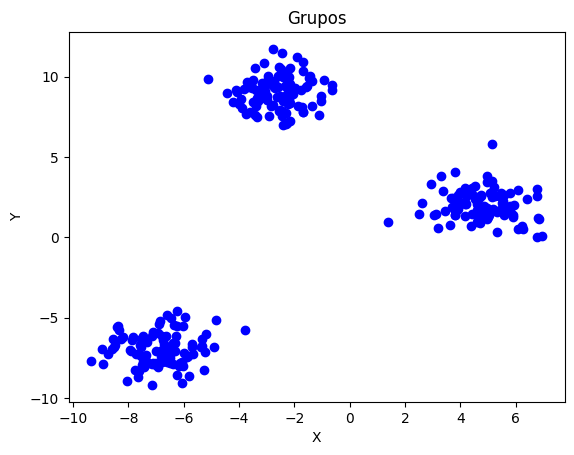

In [4]:
plt.scatter(caracteristicas[:,0], caracteristicas[:,1], c = 'blue')
plt.title('Grupos')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

#### 2. Generamos los tres centroides

Una forma de generar los centroides es de manera aleatoria dentro del espacio definido por los valores mínimos y máximos de las posiciones en los ejes $x$ y $y$. Esto asegura que los centroides iniciales estén dentro del rango de los datos a clasificar. Miremos ese espacio:

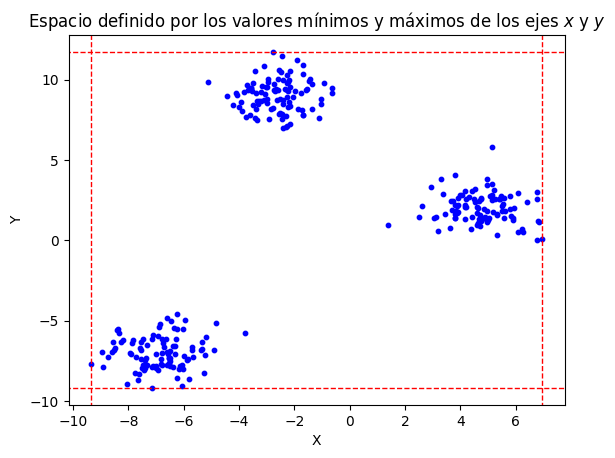

In [5]:
min_x = np.min(caracteristicas[:,0])
max_x = np.max(caracteristicas[:,0])

min_y = np.min(caracteristicas[:,1])
max_y = np.max(caracteristicas[:,1])

plt.scatter(caracteristicas[:,0], caracteristicas[:,1], c = 'blue', s = 10)
plt.axhline(y = min_y, xmin = min_x, xmax = max_x, color = "red", linewidth = 1, linestyle = "dashed")
plt.axhline(y = max_y, xmin = min_x, xmax = max_x, color = "red", linewidth = 1, linestyle = "dashed")
plt.axvline(x = min_x, ymin = min_y, ymax = max_y, color = "red", linewidth = 1, linestyle = "dashed")
plt.axvline(x = max_x, ymin = min_y, ymax = max_y, color = "red", linewidth = 1, linestyle = "dashed")
plt.title('Espacio definido por los valores mínimos y máximos de los ejes $x$ y $y$')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


Ahora sí generemos los centroides

In [6]:
array_num_rand = np.random.rand(3,2)

array_num_rand[:,0] = (max_x - min_x) * array_num_rand[:,0] + min_x
array_num_rand[:,1] = (max_y - min_y) * array_num_rand[:,1] + min_y

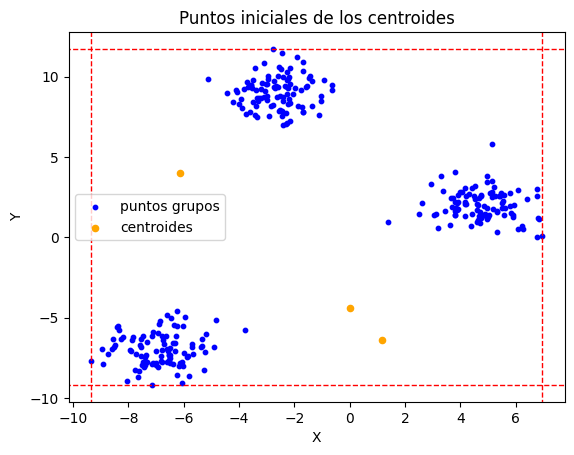

In [7]:
plt.scatter(caracteristicas[:,0], caracteristicas[:,1], c = 'blue', s = 10, label = 'puntos grupos')
plt.scatter(array_num_rand[:,0], array_num_rand[:,1], c = 'orange', s = 20, label = 'centroides')
plt.axhline(y = min_y, xmin = min_x, xmax = max_x, color = "red", linewidth = 1, linestyle = "dashed")
plt.axhline(y = max_y, xmin = min_x, xmax = max_x, color = "red", linewidth = 1, linestyle = "dashed")
plt.axvline(x = min_x, ymin = min_y, ymax = max_y, color = "red", linewidth = 1, linestyle = "dashed")
plt.axvline(x = max_x, ymin = min_y, ymax = max_y, color = "red", linewidth = 1, linestyle = "dashed")
plt.title('Puntos iniciales de los centroides')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

#### 3. Calculamos las distancias entre los centroides y los puntos en el espacio

El método ``cdist()`` de SciPy permite calcular varios tipos de distancias entre las posiciones de los puntos del conjunto de datos (guardados en la variable ``caracteristicas``) y las posiciones de los centroides (guardadas en la variable ``array_num_rand``). En este caso, utilizaremos la métrica de distancia ``euclidean``. Finalmente, para este caso, el método ``cdist()`` nos retornará un arreglo de tamaño ``(300, 3)``, lo que significa que contiene las distancias de 300 datos respecto a los 3 centroides (300 filas correspondientes a los 300 datos y 3 columnas correspondientes a los 3 centroides).

In [8]:
array_distancias = sp.spatial.distance.cdist(caracteristicas, array_num_rand, metric='euclidean')

In [9]:
array_distancias.shape

(300, 3)

#### 4. Hallamos el centroide con menor distancia al punto

Para hallar el centroide con la menor distancia a un punto, utilizaremos el método ``argmin()`` de NumPy, el cual nos retornará la posición del valor mínimo. Veamos primero un ejemplo:

In [10]:
distancias = np.array([2.5, 0.5, 1.3])
indice_min_distancia = np.argmin(distancias)

print(f"El índice del centroide más cercano es: {indice_min_distancia}")

El índice del centroide más cercano es: 1


En este ejemplo, ``argmin()`` retornará ``1`` ya que la distancia menor es ``0.5``, que corresponde a la posición ``1`` en el arreglo de distancias.

Sigamos con K-means

In [11]:
indices_distancias_min = np.argmin(array_distancias, axis = 1) 

In [12]:
indices_distancias_min

array([1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1])

Si observamos el arreglo retornado por ``argmin()`` y guardado en ``array_distancias``, podemos interpretar que el centroide en la posición correspondiente del arreglo ``array_num_rand`` es el más cercano al punto en la posición correspondiente del arreglo caracteristicas, y así sucesivamente con el resto de los puntos.

#### 5. Actualizamos la posición de los centroides 

Una método para actualizar la posición de los centroides es calculando la media de las posiciones de los puntos del conjunto de datos más cercanos al centroide.

In [13]:
for i in range(3):
    filtro_carac = caracteristicas[indices_distancias_min == i]

    array_num_rand[i,:] = np.mean(filtro_carac, axis = 0)

/home/andrescastro/miniconda3/envs/PRUEBA_JI/lib/python3.10/site-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/andrescastro/miniconda3/envs/PRUEBA_JI/lib/python3.10/site-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


Cuando aplicamos el ciclo ``for``, nos aseguramos de seleccionar los puntos más cercanos al centroide cero hasta el dos mediante la condición ``indices_distancias_min == i``. Posteriormente, realizamos un filtro para obtener únicamente los valores de las posiciones en $x$ y $y$ de dichos puntos, utilizando la instrucción ``filtro_carac = caracteristicas[indices_distancias_min == i]``. Finalmente, calculamos la media de los puntos seleccionados con respecto a las filas.

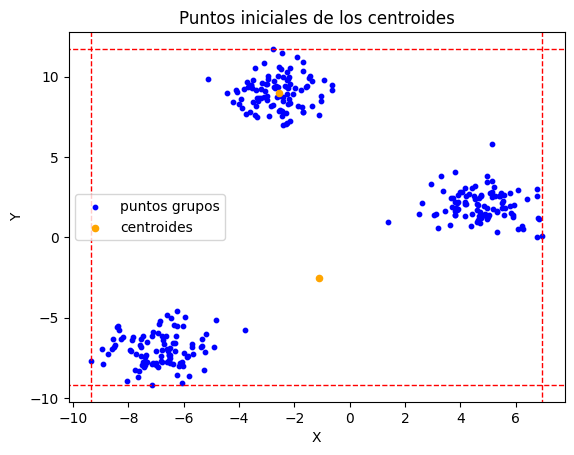

In [14]:
plt.scatter(caracteristicas[:,0], caracteristicas[:,1], c = 'blue', s = 10, label = 'puntos grupos')
plt.scatter(array_num_rand[:,0], array_num_rand[:,1], c = 'orange', s = 20, label = 'centroides')
plt.axhline(y = min_y, xmin = min_x, xmax = max_x, color = "red", linewidth = 1, linestyle = "dashed")
plt.axhline(y = max_y, xmin = min_x, xmax = max_x, color = "red", linewidth = 1, linestyle = "dashed")
plt.axvline(x = min_x, ymin = min_y, ymax = max_y, color = "red", linewidth = 1, linestyle = "dashed")
plt.axvline(x = max_x, ymin = min_y, ymax = max_y, color = "red", linewidth = 1, linestyle = "dashed")
plt.title('Puntos iniciales de los centroides')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

#### 6. Unamos todos los pasos 

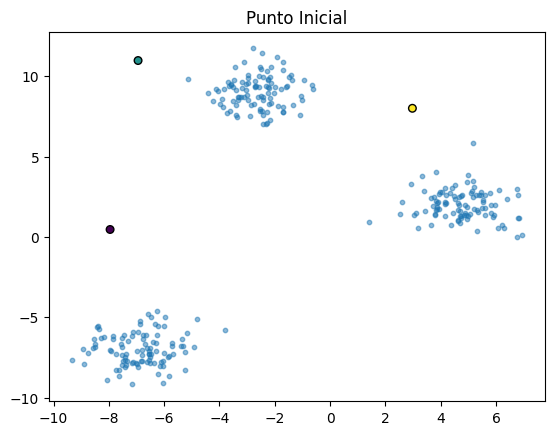

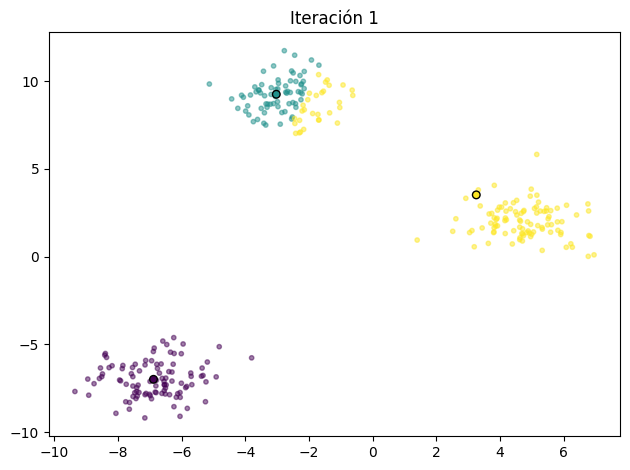

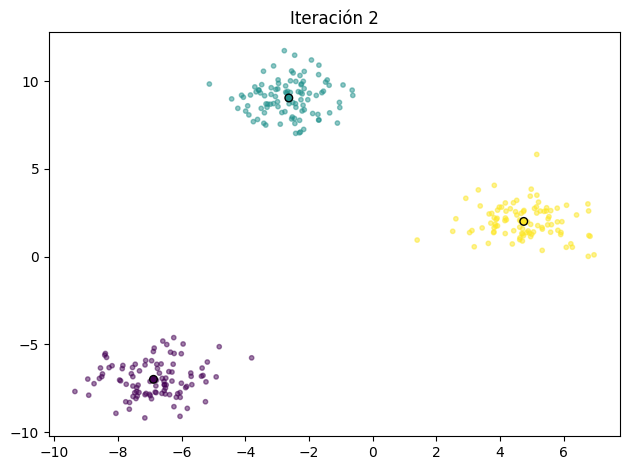

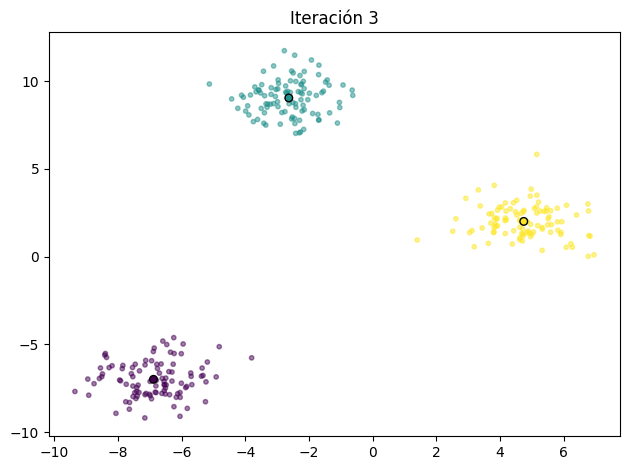

In [15]:
min_x = np.min(caracteristicas[:,0])
max_x = np.max(caracteristicas[:,0])

min_y = np.min(caracteristicas[:,1])
max_y = np.max(caracteristicas[:,1])

array_num_rand = np.random.rand(3,2)

array_num_rand[:,0] = (max_x - min_x) * array_num_rand[:,0] + min_x
array_num_rand[:,1] = (max_y - min_y) * array_num_rand[:,1] + min_y

iteraciones = 3


plt.scatter(caracteristicas[:,0], caracteristicas[:,1], s = 10, alpha = 0.5)
plt.scatter(array_num_rand[:,0], array_num_rand[:,1], c = [0,1,2], cmap = 'viridis', edgecolors='black', s = 30, label = 'centroides')
plt.title(f'Punto Inicial')
plt.show()

for iteracion in range(iteraciones):
    array_distancias = sp.spatial.distance.cdist(caracteristicas, array_num_rand, metric='euclidean')
    indices_distancias_min = np.argmin(array_distancias, axis = 1) 

    for i in range(3):
        filtro_carac = caracteristicas[indices_distancias_min == i]
        array_num_rand[i,:] = np.mean(filtro_carac, axis = 0)

    plt.scatter(caracteristicas[:,0], caracteristicas[:,1], c = indices_distancias_min, cmap = 'viridis', s = 10, alpha = 0.5)
    plt.scatter(array_num_rand[:,0], array_num_rand[:,1], c = [0,1,2], cmap = 'viridis', edgecolors='black', s = 30, label = 'centroides')
    plt.title(f'Iteración {iteracion + 1}')


    plt.tight_layout()
    plt.show()

## 2.2 Implementación del algoritmo K-means con la librería Scikit-learn

Anteriormente, implementamos K-means utilizando las librerías NumPy y SciPy. Aunque esta implementación puede generar resultados satisfactorios, la biblioteca Scikit-learn ofrece una implementación del algoritmo K-means que requiere menos líneas de código y es más flexible. Con Scikit-learn, es posible configurar el algoritmo para diferentes cantidades de grupos, manejar múltiples dimensiones y lograr una mayor velocidad de cómputo. ¡Comencemos!

#### 1. Generemos un conjunto de datos pero esta vez con más de tres grupos

In [16]:
from sklearn.datasets import make_blobs

In [17]:
caracteristicas, _ = make_blobs(n_samples = 2000, centers = 5, n_features = 2, center_box=(-25.0, 25.0), random_state= 42)

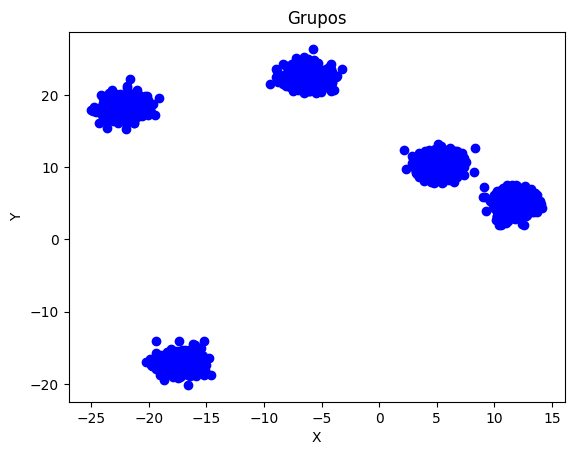

In [18]:
plt.scatter(caracteristicas[:,0], caracteristicas[:,1], c = 'blue')
plt.title('Grupos')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

#### 2. Implementemos K-means con Scikit-learn

Para implementar K-means con Scikit-learn primero debemos importar KMeans

In [19]:
from sklearn.cluster import KMeans

Una vez importado KMeans debemos generar una instacia de la clase ``KMeans``. La clase ``KMeans`` requiere algunos atributos importantes.

In [20]:
kmeans = KMeans(n_clusters = 5, init='random', max_iter=300)

- ``n_clusters``: indica la cantidad de centroides que se generarán.
- ``init``: especifica la forma en que se inicializarán los centroides.
- ``max_iter``: define el número máximo de iteraciones.

Para ejecutar nuestro algoritmo, es necesario utilizar el método ``fit()``. Este método requiere, como parámetro, el arreglo de características generado por ``make_blobs``.

In [21]:
kmeans.fit(caracteristicas)

KMeans(init='random', n_clusters=5)

Finalmente, podemos hacer uso de dos atributos: ``labels_``, que nos retorna un arreglo indicando a qué grupo pertenece cada punto, y ``cluster_centers_``, que nos devuelve las coordenadas de los centroides generados.

In [22]:
etiquetas = kmeans.labels_
coor_centroides = kmeans.cluster_centers_

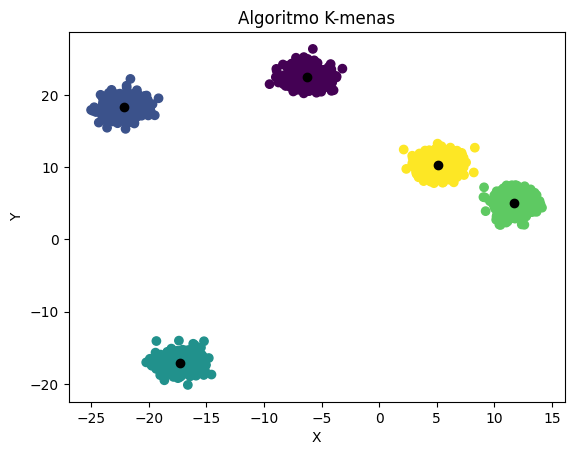

In [23]:
plt.scatter(caracteristicas[:,0], caracteristicas[:,1], c = etiquetas)
plt.scatter(coor_centroides[:,0], coor_centroides[:,1], c = 'black')
plt.title('Algoritmo K-menas')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Acabamos de ver una forma más rápida de implementar K-means para realizar pruebas más eficientes. Ahora, hagamos una prueba más, esta vez con un conjunto de datos que siga otra distribución.

Utilicemos la función para generar datos sintéticos de Scikit-learn sugerida en el reto 2 de la sección 1, make_circles.

In [24]:
from sklearn.datasets import make_circles

In [25]:
carac_circulos, l = make_circles(n_samples= 1000, factor=0.5, noise=0.05, random_state=42)

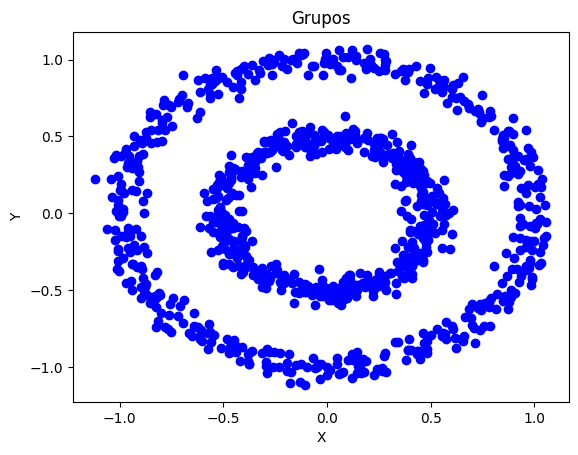

In [26]:
plt.scatter(carac_circulos[:,0], carac_circulos[:,1], c = 'blue')
plt.title('Grupos')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Como se observa en la gráfica tenemos dos grupos por esta razón estableceremos el parámetro ``n_clusters = 2`` 

In [27]:
kmeans = KMeans(n_clusters = 2, init='random', max_iter=300)
kmeans.fit(carac_circulos)


KMeans(init='random', n_clusters=2)

In [28]:
etiquetas = kmeans.labels_
coor_centroides = kmeans.cluster_centers_

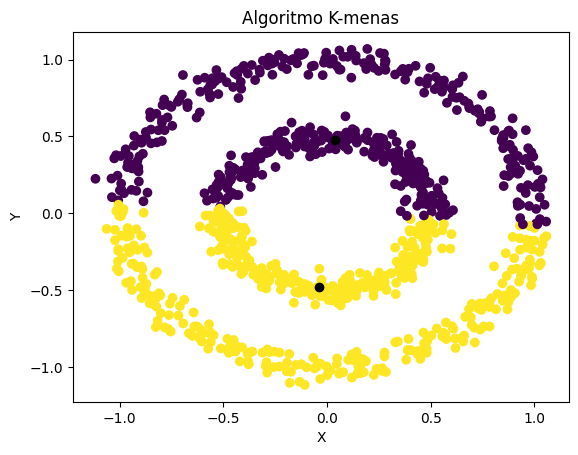

In [29]:
plt.scatter(carac_circulos[:,0], carac_circulos[:,1], c = etiquetas)
plt.scatter(coor_centroides[:,0], coor_centroides[:,1], c = 'black')
plt.title('Algoritmo K-menas')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

En este caso, K-means no logra realizar un agrupamiento correcto, que se puede observar a continuación:

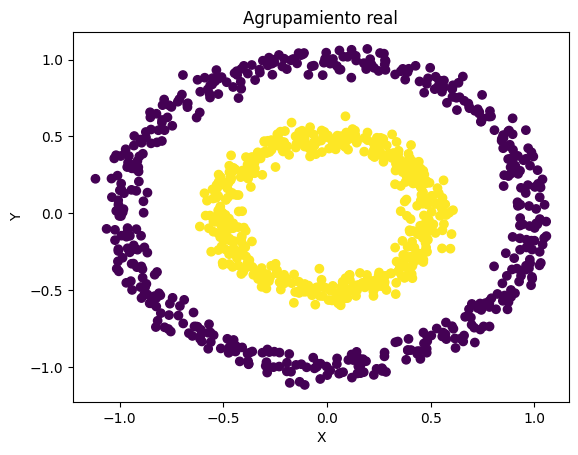

In [30]:
plt.scatter(carac_circulos[:,0], carac_circulos[:,1], c = l)
plt.title('Agrupamiento real')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Podemos ver que K-means no logra realizar un agrupamiento adecuado para este tipo de datos. Con esto, podemos dar por finalizada esta sección. Sin embargo, queda la pregunta: ¿qué podemos hacer cuando tenemos una distribución de datos como la presentada anteriormente? Esto tendrá repuesta en las siguientes secciones.

# Retos

#### 1. Realizar el algoritmo K-means de forma general (para cualquier número de grupos) con las librerías NumPy y SciPy

In [31]:
#Código

#### 2. Consultar la documentación proporcionada por Scikit-learn sobre K-means para identificar otros atributos que se pueden utilizar al instanciar KMeans. https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans